# Brazilian capitals' temperatures: analysis and prediction on time-series data

Brazil has continental dimensions and its cities cover many latitudes and longitudes. As one of the consequences, the weather can change a lot depending on which city you are: Belém, Curitiba, Fortaleza, Goiânia, Macapá, Manaus, Recife, Rio de Janeiro, Salvador, São Luiz, São Paulo, Vitória, etc. How the temperature of each city behaves over the year? How is it possible to justify this behavior based on geography (as distance to the beach or latitude and longitude position)? What's the hottest temperature registered? And the coolest? To which city it belongs? When that happened? Is it possible to detect evidences of the global warming?

The data used to answer those questions consists in a bunch of datasets available by NASA, downloaded from this link: https://www.kaggle.com/volpatto/temperature-timeseries-for-some-brazilian-cities/data (that redirects to this one: https://data.giss.nasa.gov/gistemp/station_data_v4_globe/), and it's about some brazilian capitals' temperatures (in Celsius), more especifically, those mentioned in the previous paragraph (the second link provides data from all over the world).

This notebook has three sections: Pre-processing, Analysis and Conclusions. The first two are guided by questions, those constitute the sub-sections. The last ones resumes and concludes what was observed in the analysis.

1. Pre-processing\
    1.1. Is there invalid data?\
    1.2. Is there missing data?\
    1.3. Is there inconsistent data?\
    1.4. How many invalid temperatures are there in the datasets?\
    1.5. How much data would be lost if the rows containing invalid data were discarded?\
    1.6. How are they distributed?\
    1.7. What should be done with the invalid data?
2. Analysis\
    2.1. How did the monthly average temperature behave over the years for each city?\
    2.2. How do this behavior change between the capitals?\
    2.3. Does the annual average temperature shows a trend over the years?\
    2.4. And how about the minimum and maximum temperatures?\
    2.5. Which cities have the hottest mean temperatures? And coolest?\
    2.6. Which cities have the greatest amplitude temperatures? And smallest?\
    2.7. What's the minimum temperature registered? From which capital does it belong? When did it happen?\
    2.8. How about the maximum?
3. Conclusions

## 1. Pre-processing

In this section, it's verified if there are missing, invalid or inconsistent values. If there are, an analysis of how they are distributed in the datasets is needed, so it's possible to decide what to do with them (discard, replace, etc).

In [1]:
# python modules used in the code

import pandas as pd
import seaborn as sns
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from math import trunc

In [2]:
# In this cell, the datasets are stored in a dictionary, where each key corresponds to the capital name.
# The undesired columns are also dropped.

undesired_columns = ['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N']

datasets = {
    'Belém':           pd.read_csv('station_belem.csv'),
    'Curitiba':        pd.read_csv('station_curitiba.csv'),
    'Fortaleza':       pd.read_csv('station_fortaleza.csv'),
    'Goiânia':         pd.read_csv('station_goiania.csv'),
    'Macapá':          pd.read_csv('station_macapa.csv'),
    'Manaus':          pd.read_csv('station_manaus.csv'),
    'Recife':          pd.read_csv('station_recife.csv'),
    'Rio de Janeiro':  pd.read_csv('station_rio.csv'),
    'Salvador':        pd.read_csv('station_salvador.csv'),
    'São Luiz':        pd.read_csv('station_sao_luiz.csv'),
    'São Paulo':       pd.read_csv('station_sao_paulo.csv'),
    'Vitória':         pd.read_csv('station_vitoria.csv')
}

columns = datasets['Belém'].columns

for k in datasets.keys():
    datasets[k] = datasets[k].drop(undesired_columns, axis = 1)

In [3]:
original_data = datasets.copy()

In [4]:
datasets['Recife'].head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
0,1942,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,25.23,999.90
1,1943,25.73,25.73,26.03,24.83,24.03,23.23,22.33,22.53,23.43,24.73,25.13,25.52,24.41
2,1944,25.62,25.92,26.22,25.02,24.12,23.42,22.62,21.92,22.82,24.32,25.42,26.02,24.41
3,1945,26.52,25.52,26.52,25.82,24.32,22.72,22.32,23.02,23.82,24.52,25.52,25.41,24.72
4,1946,25.51,26.41,25.81,24.61,24.51,23.41,23.41,23.41,23.61,24.41,24.81,25.30,24.61


In [5]:
datasets['Goiânia'].head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
0,1961,24.21,25.03,25.58,25.24,23.53,21.68,20.70,22.63,27.25,26.52,26.25,24.28,24.42
1,1962,25.21,25.56,24.93,24.64,22.01,20.74,20.39,23.24,26.32,25.02,25.51,24.21,23.99
2,1963,25.48,25.37,25.95,24.89,21.32,19.76,20.56,23.06,25.92,28.06,27.01,25.56,24.30
3,1964,24.83,25.77,25.36,24.88,22.71,20.10,20.72,23.28,25.43,24.54,23.77,24.19,23.91
4,1965,24.36,25.04,24.23,24.44,23.64,21.96,21.82,23.49,25.93,24.95,25.00,25.06,24.09


### 1.1. Is there invalid data?

In [6]:
# showing the first row of each dataset

pd.concat([dataset.head(1) for dataset in datasets.values()])

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
0,1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.38
0,1961,21.80,21.84,20.51,19.14,16.05,14.87,15.43,17.17,18.56,19.53,20.56,20.81,18.86
0,1961,26.88,25.44,26.00,25.85,26.08,25.71,25.26,25.16,25.51,25.94,26.33,26.53,25.89
0,1961,24.21,25.03,25.58,25.24,23.53,21.68,20.70,22.63,27.25,26.52,26.25,24.28,24.42
0,1967,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,26.89,999.90
0,1910,27.29,26.99,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79,27.55
0,1942,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,25.23,999.90
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,24.16
0,1961,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,24.97,999.90
0,1979,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,28.05,999.90


In [7]:
# showing the last row of each dataset

pd.concat([dataset.tail(1) for dataset in datasets.values()])

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
58,2019,27.60,27.20,27.35,27.90,28.40,28.50,28.80,28.85,28.90,28.50,999.9,999.9,28.19
58,2019,25.15,22.30,21.65,20.95,18.55,17.15,15.45,16.10,18.00,21.25,999.9,999.9,20.16
58,2019,27.95,27.80,27.05,27.25,27.75,27.20,27.00,27.25,27.90,28.20,999.9,999.9,27.68
58,2019,26.85,26.30,26.15,25.85,25.15,23.40,22.85,25.70,28.85,28.30,999.9,999.9,26.12
52,2019,27.35,27.00,27.30,27.25,28.05,28.30,28.25,29.00,29.30,29.60,999.9,999.9,28.14
109,2019,27.95,28.10,28.95,28.40,28.20,28.75,29.10,29.60,30.40,29.00,999.9,999.9,28.76
77,2019,27.00,27.15,27.35,26.55,26.10,24.75,24.00,23.75,24.65,25.40,999.9,999.9,25.82
46,2019,30.25,28.05,27.50,26.55,24.85,23.10,21.75,22.30,23.05,25.25,999.9,999.9,25.51
58,2019,28.05,29.30,999.90,999.90,26.75,999.90,24.80,24.75,25.35,26.40,999.9,999.9,26.68
40,2019,27.85,26.95,27.10,27.70,28.25,28.25,28.00,28.65,29.10,29.00,999.9,999.9,28.12


It's possible to see temperatures registered as "999.90", wich is too high. The conclusion is that this value is used to replace invalid temperatures or missing ones.

### 1.2. Is there missing data?

Observing the datasets from Recife and Goiânia at the beginning of the section, it's evident that each line has data from an especif year forming a time-series. In this subsection, the question is: are there missing years, or in other words, missing lines?

In [8]:
# calculating the amplitude of the years that each dataset covers

for dataset in datasets.values():
    print(dataset.YEAR.max() - (dataset.YEAR.min() - 1))

59
59
59
59
53
110
78
47
59
41
74
59


In [9]:
# getting the original shapes of the datasets

shapes = pd.DataFrame({
    'Dataset Shape': [dataset.shape[0] for dataset in datasets.values()]},
    index = datasets.keys()
)
shapes

,Dataset Shape
Belém,59
Curitiba,59
Fortaleza,59
Goiânia,59
Macapá,53
Manaus,110
Recife,78
Rio de Janeiro,47
Salvador,59
São Luiz,41


As the gap between the first year registered and the last is equal to the dataset number of lines, it's concluded that there are no missing years.

### 1.3. Is there inconsistent data?

In [10]:
for k in datasets.keys():
    datasets[k] = datasets[k].replace(999.90, np.nan)

In [11]:
# checking if there are inconsistent values (like too low temperatures or too high, for brazilian standards)

min_values = list()
max_values = list()
for dataset in datasets.values():
    data = dataset.iloc[:, 1:-1]
    min_value = data.min().min()
    max_value = data.max().max()
    min_values.append(min_value)
    max_values.append(max_value)
print('min: ', min(min_values), 'Cº')
print('max: ', max(max_values), 'Cº')

min:  12.08 Cº
max:  32.3 Cº


The maximum temperature found in all dataset, as well as the minimum, is reachable, so, there is no inconsistent data.

### 1.4. How many invalid temperatures are there in the datasets?

In [12]:
invalid_rates = list()
for k in datasets.keys():
    shape = shapes.loc[k, 'Dataset Shape']
    total_invalid = (shape - datasets[k].count()).sum()
    rate = total_invalid/shape * 14
    invalid_rates.append(float(f'{rate:.1f}'))
    print(f'{k}: {rate:.1f}%')

Belém: 51.3%
Curitiba: 23.7%
Fortaleza: 38.7%
Goiânia: 28.0%
Macapá: 19.0%
Manaus: 20.7%
Recife: 14.2%
Rio de Janeiro: 15.2%
Salvador: 23.7%
São Luiz: 41.7%
São Paulo: 10.0%
Vitória: 32.3%


### 1.5 How much data would be lost if the rows containing invalid data were discarded?

In [13]:
# counting how many invalid temperatures (999.90 Cº) has each row of each dataset

def search_value(row, value):
    global invalid_data
    if value in row.value_counts(dropna = False):
        frequency = row.value_counts(dropna = False)[value]
        if frequency in invalid_data:
            invalid_data[frequency] += 1
        else:
            invalid_data[frequency] = 1
            

invalid_datas = list()

for dataset in datasets.values():
    invalid_data = dict()
    dataset.apply(lambda row: search_value(row, np.nan), axis = 1)
    invalid_datas.append(invalid_data)

In [14]:
# building a dataframe with the invalid datas found in the previous cell, as well as other informations:
#  1~13: How many rows have 1 invalid data, 2 invalid datas, and so on...
#  Total: total number of rows with invalid data
#  Loss: The pencentage of data that will be discarded if we drop the rows with invalid data

frequency_table = pd.DataFrame(invalid_datas, index = datasets.keys()).fillna(0).astype(int)
total_frequency = pd.DataFrame(frequency_table.apply(np.sum, axis = 1), columns = ['Total'])

loss_list = list()
i = 0
for k in datasets.keys():
    loss = total_frequency.loc[k, 'Total']/shapes.loc[k, 'Dataset Shape'] * 100
    loss_list.append(float(f'{loss:.1f}'))
loss_list = pd.DataFrame({'Loss(%)': loss_list}, index = datasets.keys())
pd.concat([shapes, frequency_table, total_frequency, loss_list], axis = 1)

,Dataset Shape,1,2,3,4,5,6,7,8,9,10,11,12,13,Total,Loss(%)
Belém,59,11,3,5,0,1,0,0,1,2,0,1,1,10,35,59.3
Curitiba,59,2,4,1,0,0,0,0,0,1,3,1,2,1,15,25.4
Fortaleza,59,3,3,1,2,3,1,3,0,0,0,1,1,6,24,40.7
Goiânia,59,2,4,0,0,0,0,4,1,1,0,1,0,4,17,28.8
Macapá,53,4,5,1,0,0,0,1,0,0,1,0,1,2,15,28.3
Manaus,110,5,3,1,0,0,0,1,0,2,1,1,1,7,22,20.0
Recife,78,12,4,4,1,0,0,0,0,2,0,0,1,1,25,32.1
Rio de Janeiro,47,2,4,0,0,0,0,1,0,0,1,0,2,0,10,21.3
Salvador,59,11,10,4,1,1,0,1,0,2,0,1,1,0,32,54.2
São Luiz,41,6,2,1,1,0,2,1,3,0,0,1,1,3,21,51.2


In [15]:
invalid_rates_df = pd.DataFrame(invalid_rates, index = datasets.keys())
pd.concat(
    [invalid_rates_df, loss_list],
    ignore_index = True,
    axis = 1).rename({0: 'Invalid Data(%)', 1: 'Invalid Lines(%)'}, axis = 'columns')

,Invalid Data(%),Invalid Lines(%)
Belém,51.3,59.3
Curitiba,23.7,25.4
Fortaleza,38.7,40.7
Goiânia,28.0,28.8
Macapá,19.0,28.3
Manaus,20.7,20.0
Recife,14.2,32.1
Rio de Janeiro,15.2,21.3
Salvador,23.7,54.2
São Luiz,41.7,51.2


The table above shows that, sometimes, choosing to discard entire lines with invalid data results in much more lost data, because it depends on how the invalid data is distributed along the datasets.

### 1.6. How they are distributed?

In [16]:
# creating a dataframe where the indexes are the capitals names and the columns, the years
# (the content corresponds to the total of invalid data registrated)

def count_value(row, value):
    global frequency_array
    if value in row.value_counts(dropna = False):
        frequency = row.value_counts(dropna = False)[value]
        frequency_array.append(frequency)
    else:
        frequency_array.append(0)
           

frequency_arrays = list()

for dataset in datasets.values():
    frequency_array = list()
    dataset.apply(lambda row: count_value(row, np.nan), axis = 1)
    frequency_arrays.append(frequency_array)
    
max_length = max([len(array) for array in frequency_arrays])
frequency_arrays = [[13] * (max_length - len(array)) + array for array in frequency_arrays]

frequency_df = pd.DataFrame(frequency_arrays, index = datasets.keys(), columns = range(1910, 2020))
frequency_df

,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Belém,13,13,13,13,13,13,13,13,13,13,...,8,12,0,0,0,11,1,0,0,2
Curitiba,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,2
Fortaleza,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,5,0,0,0,2
Goiânia,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,1,0,2,2
Macapá,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,2
Manaus,0,0,0,0,0,0,0,0,0,0,...,13,13,3,0,0,0,1,0,0,2
Recife,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,2
Rio de Janeiro,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,1,0,0,0,2
Salvador,13,13,13,13,13,13,13,13,13,13,...,1,9,1,0,0,0,1,1,9,5
São Luiz,13,13,13,13,13,13,13,13,13,13,...,1,0,0,8,11,7,8,0,0,2


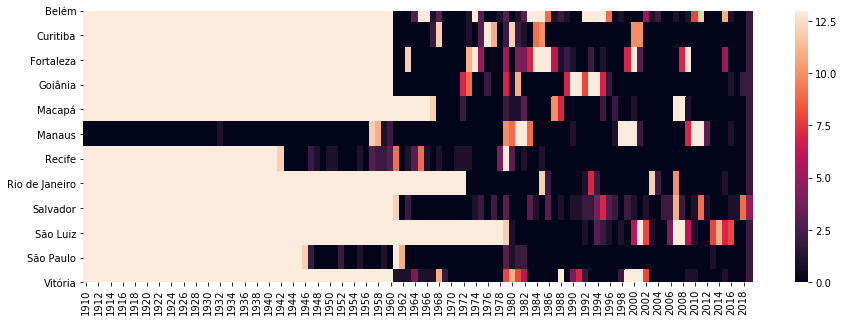

In [17]:
# plotting a heatmap to see how the invalid data is situated in the datasets

plt.figure(figsize = (15, 5))
heatmap_before = sns.heatmap(frequency_df)
plt.savefig(f'heatmap_before.png',  bbox_inches = 'tight')
heatmap_before

The heatmap enhance what was observed in the subsection 1.5. Manaus, for example, has great part of its invalid data occupying entire rows, so, dropping them or just the invalid data doesn't make a lot of diference (20% and 20.7%, respectively). In the other hand, look at Salvador. Note that its invalid data is more distributed, in other words, the rows have few invalid data and, for this reason, discarding them increases the loss rate (23.7% against 54.2%).

### 1.7. What should be done with the invalid data?

In [18]:
# in this cell, the temperatures 999.90Cº are replaced by the mean monthly temperature of the entire dataset,
# except for thouse in the metANN column, whose were replaced by the annual average

for k in datasets.keys():
    for col in datasets[k].iloc[:, 1:].columns:
        datasets[k][col] = datasets[k][col].replace(np.nan, datasets[k][col].mean())
    datasets[k]['metANN'] = datasets[k].iloc[:, 1:-1].mean(axis = 1)

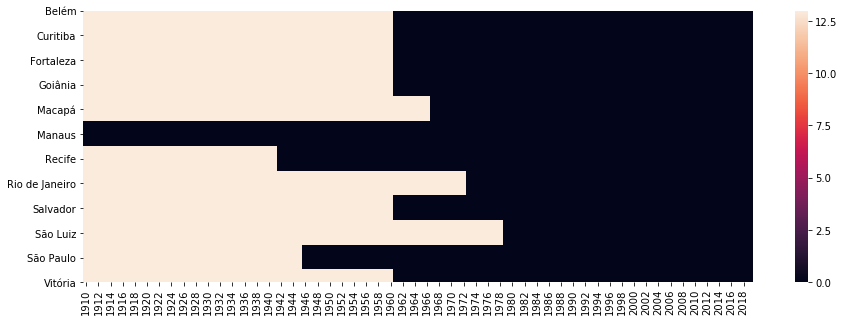

In [19]:
# checking if all invalid temperatures were replaced

frequency_arrays = list()

for dataset in datasets.values():
    frequency_array = list()
    dataset.apply(lambda row: count_value(row, np.nan), axis = 1)
    frequency_arrays.append(frequency_array)
    
max_length = max([len(array) for array in frequency_arrays])
frequency_arrays = [[13] * (max_length - len(array)) + array for array in frequency_arrays]

frequency_df = pd.DataFrame(frequency_arrays, index = datasets.keys(), columns = range(1910, 2020))

plt.figure(figsize = (15, 5))
heatmap_after = sns.heatmap(frequency_df)
plt.savefig(f'heatmap_after', bbox_inches = 'tight')

As this notebook investigates questions relating to mean, maximum and minimum temperatures, replacing the invalid data with the monthly mean calculated from the entire dataset intends to affect as little as possible the analysis.
The heatmap above shows that the invalid data was correctly replaced.

## 2. Analysis

Now that we are secure about the quality of the datasets, the analysis may begin.

### 2.1. How do the monthly average temperature behave over the years for each city?

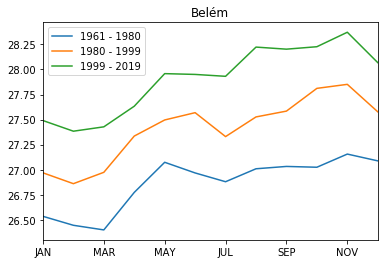

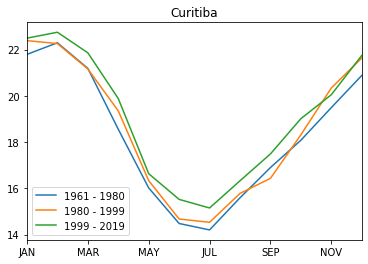

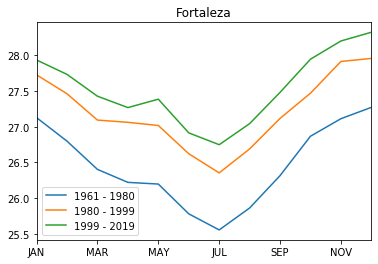

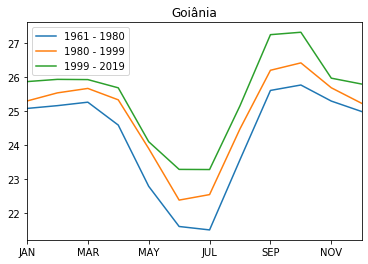

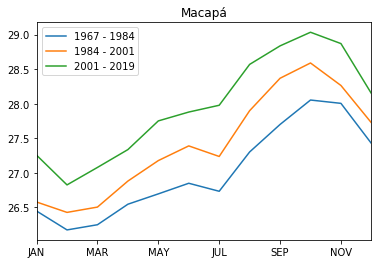

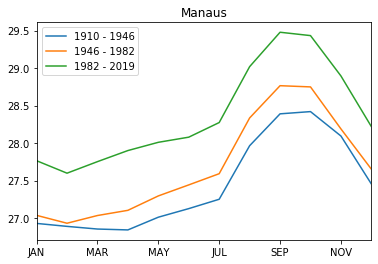

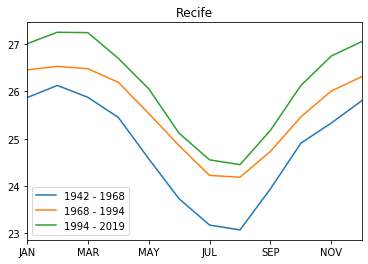

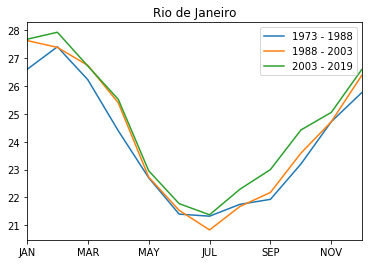

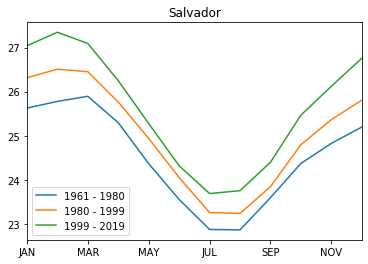

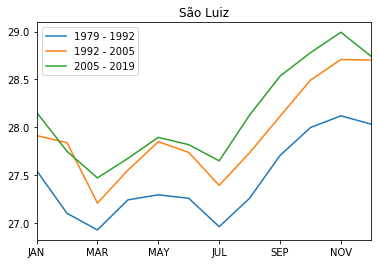

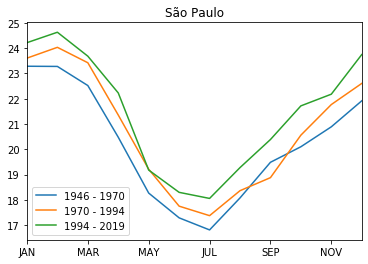

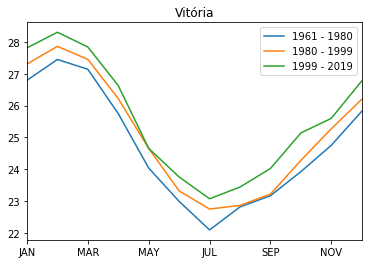

In [20]:
# this cell builds graphics showing the monthly average temperature behave, for three periods of time,
# for each city

for k in datasets.keys():
    # getting dataset length
    length = datasets[k].shape[0]
    div = trunc(length/3)
    splits = [(0, div), (div, 2*div), (2*div, length)]

    means = list()
    # calculating the monthly average temperature for three splits of the dataset
    for s in splits:
        means.append(datasets[k].iloc[s[0]:s[1], 1:-1].mean())

    years = [datasets[k].YEAR[i] for i in [0, div, 2*div, length - 1]]
    indexes = [f'{years[i]} - {years[i+1]}' for i in range(0,3)]

    # storing the data in a dataframe and plotting the graph for a singular capital
    three_periods = pd.DataFrame(means, index = indexes).transpose().plot().set_title(k)
    #plt.savefig(f'{k}_three_periods.png')
    three_periods

### 2.2. How do the behavior of the monthly mean temperature change between the capitals?

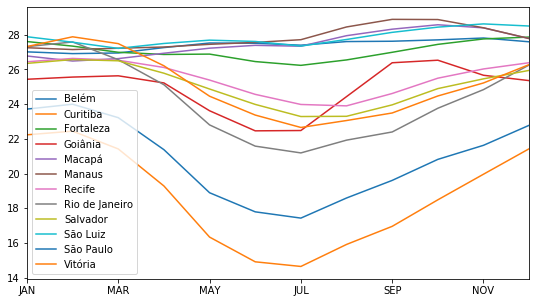

In [21]:
# this cell plots a graph showing the monthly average temperature during the year, where each line corresponds to a
# capital (the average is taken from the whole capital's dataset)

means = list()
for k in datasets.keys():
    # taking the capitals monthly averages
    means.append(datasets[k].iloc[:, 1:-1].mean())

# transforming in a dataframe and plotting them
monthly_avg = pd.DataFrame(means, index = datasets.keys()).transpose().plot(figsize = (9, 5))
#plt.savefig(f'monthly_avg.png',  bbox_inches = 'tight')
monthly_avg

### 2.3 Does the annual average temperature shows a trend over the years?

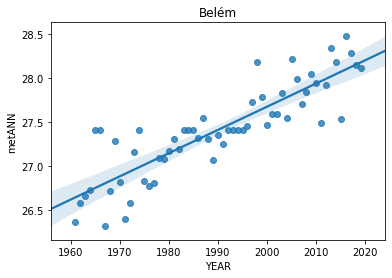

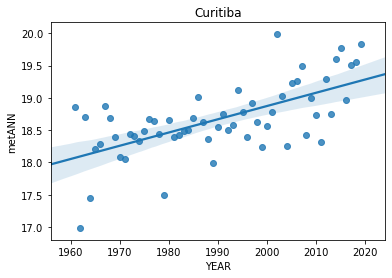

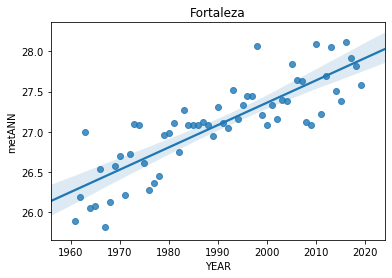

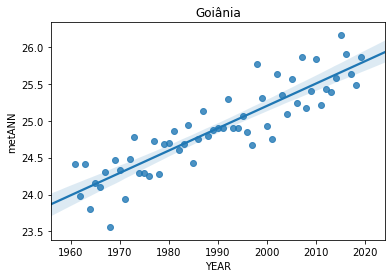

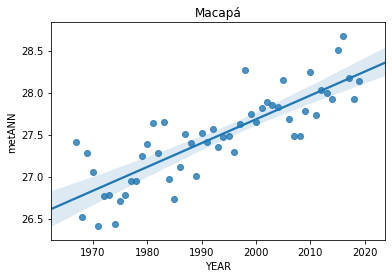

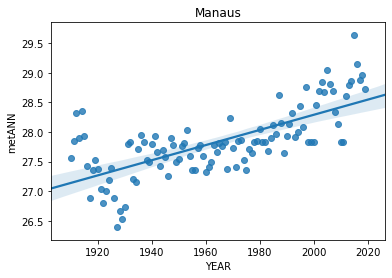

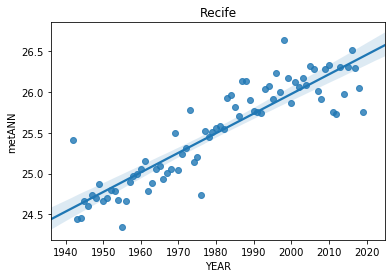

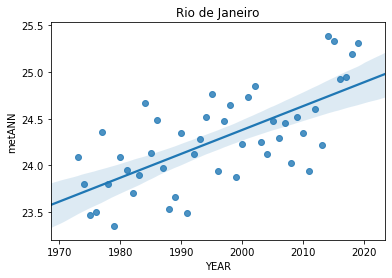

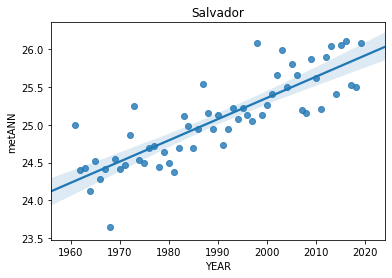

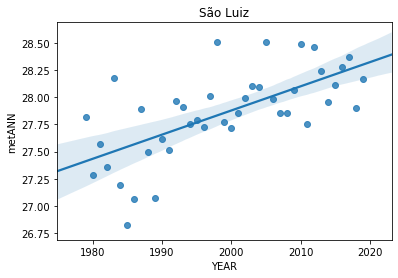

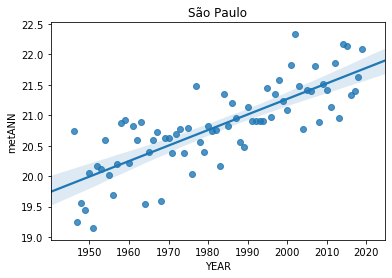

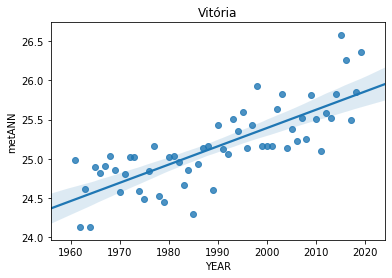

<Figure size 432x288 with 0 Axes>

In [22]:
# this cell has the main objective of constructing a graph, for each capital, showing the annual average
# temperature behave through the years, as a trend line

for k in datasets.keys():
    # setting apart the columns 'YEAR' and 'metANN'
    year_and_metann = datasets[k].loc[:, ['YEAR', 'metANN']]
    # plotting
    sns.regplot(x = 'YEAR', y = 'metANN', data = year_and_metann).set_title(f'{k}')
    #plt.savefig(f'{k}_metANN.png')
    plt.show()
    plt.clf()

### 2.4 And how about the minimum and maximum temperatures?

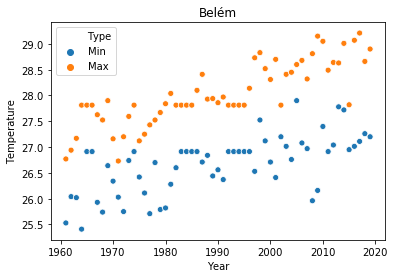

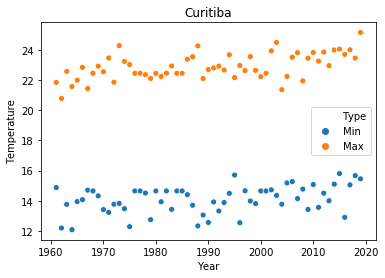

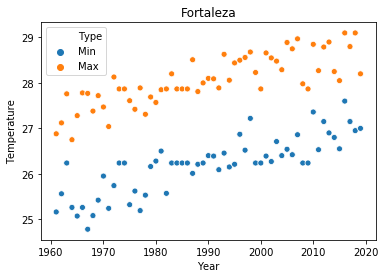

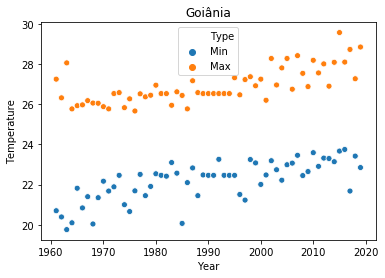

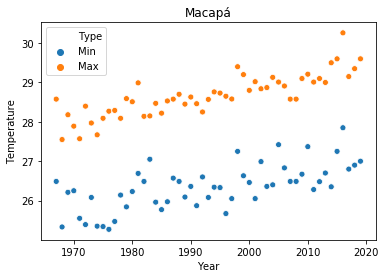

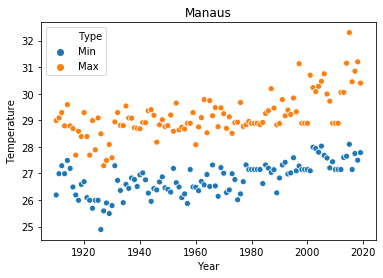

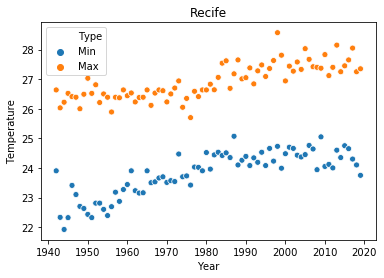

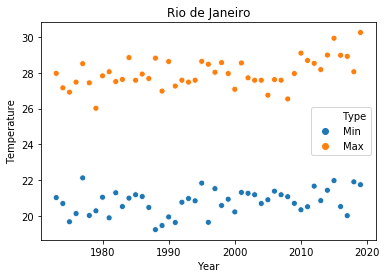

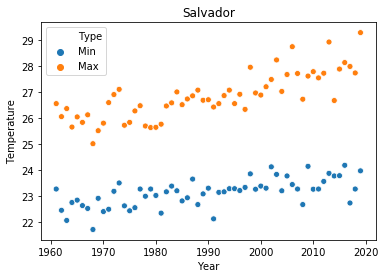

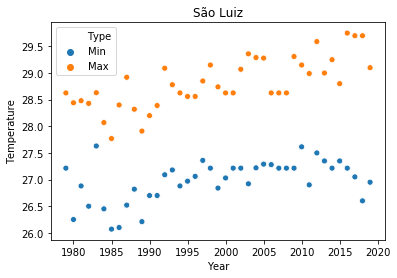

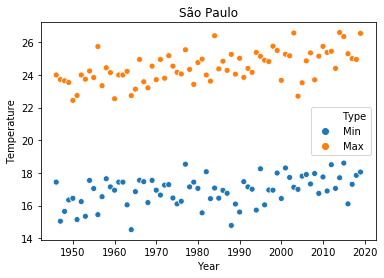

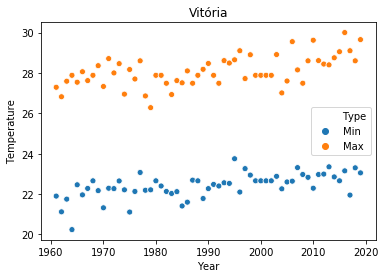

<Figure size 432x288 with 0 Axes>

In [23]:
# generating graphics for each city containing the maximum and minimum annual temperatures, and how they progress
# over the years

for k in datasets.keys():
    # separating the month columns
    dataset = datasets[k].iloc[:, 1:-1]
    # getting the minimum and maximum annual temperatures, as its years, and transforming in a dataframe
    mins = pd.DataFrame(
        {'Year': datasets[k]['YEAR'],
         'Temperature': dataset.min(axis = 1),
         'Type': ['Min'] * shapes.loc[k, 'Dataset Shape']})
    maxs = pd.DataFrame(
        {'Year': datasets[k]['YEAR'],
         'Temperature': dataset.max(axis = 1),
         'Type': ['Max'] * shapes.loc[k, 'Dataset Shape']})
    df = pd.concat([mins, maxs])
    
    # plotting the results for every capital
    sns.scatterplot(x = 'Year', y = 'Temperature', hue = 'Type', data = df).set_title(k)
    #plt.savefig(f'{k}_max_min.png')
    plt.show()
    plt.clf()

### 2.5. Which cities have the hottest mean temperatures? And coolest?

In [24]:
# sortting the cities by the decreasing mean temperature of the whole capital dataset

capitals_means = list()
for k in datasets.keys():
    # calculating averages
    mean_metann = floor(datasets[k].metANN.mean() * 10)/ 10
    min_temp = floor(datasets[k].iloc[:, 1:-1].min(axis = 1).mean() * 10)/10
    max_temp = floor(datasets[k].iloc[:, 1:-1].max(axis = 1).mean() * 10)/10
    # building a matrix where each row contains a city and its averages
    capitals_means.append([k, mean_metann, min_temp, max_temp])
    
# converting to a dataframe
mean_df = pd.DataFrame(capitals_means, columns = ['Capital', 'Mean temperature', 'Mean minimum', 'Mean maximum'])
# sorting it
mean_df = mean_df.sort_values(by = 'Mean temperature', ascending = False)
mean_df = mean_df.set_index('Capital')
# showing
mean_df

,Mean temperature,Mean minimum,Mean maximum
Capital,,,
Manaus,27.8,26.8,29.1
São Luiz,27.8,26.9,28.8
Belém,27.4,26.6,28.0
Macapá,27.4,26.3,28.6
Fortaleza,27.0,26.1,28.0
Recife,25.5,23.8,26.9
Vitória,25.1,22.4,28.0
Salvador,25.0,23.1,26.8
Goiânia,24.8,22.1,26.9


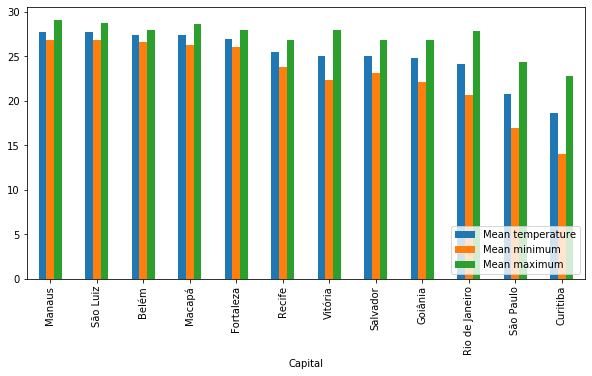

In [25]:
# showing as a bar chart
max_min_mean = mean_df.plot.bar(figsize = (10,5)).legend(loc = 'lower right')
#plt.savefig(f'max_min_mean.png', bbox_inches = 'tight')
max_min_mean

### 2.6. Which cities have the greatest amplitude temperatures? And smallest?

In [26]:
# sortting the cities by the increasing mean temperature amplitude

# calculating the amplitudes and storing in a dataframe
mean_range = pd.DataFrame(mean_df['Mean maximum'] - mean_df['Mean minimum'], columns = ['Mean range'])
mean_df = pd.concat([mean_df, mean_range], axis = 1)
mean_df = mean_df.sort_values(by = 'Mean range')
mean_df

,Mean temperature,Mean minimum,Mean maximum,Mean range
Capital,,,,
Belém,27.4,26.6,28.0,1.4
Fortaleza,27.0,26.1,28.0,1.9
São Luiz,27.8,26.9,28.8,1.9
Manaus,27.8,26.8,29.1,2.3
Macapá,27.4,26.3,28.6,2.3
Recife,25.5,23.8,26.9,3.1
Salvador,25.0,23.1,26.8,3.7
Goiânia,24.8,22.1,26.9,4.8
Vitória,25.1,22.4,28.0,5.6


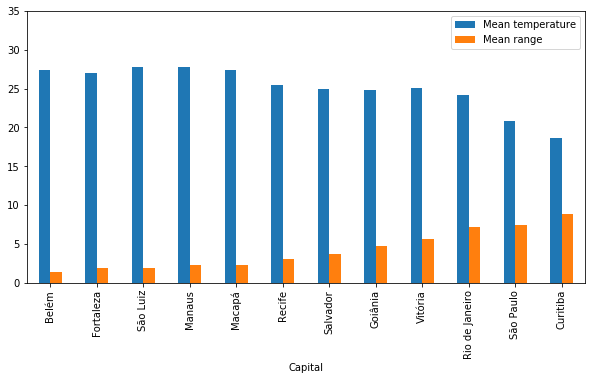

In [27]:
# showing as a bar chart

plot_bar = mean_df.drop(['Mean minimum', 'Mean maximum'], axis = 1).plot.bar(ylim = (0, 35), figsize = (10, 5))
#plt.savefig(f'{k}_metANN.png', bbox_inches = "tight")
plot_bar

### 2.7. What's the minimum temperature registered? From which capital does it belong? When did it happen?

In [28]:
# in this cell, the data from all capitals are put together

# the new column names
renamed_columns = ['Capital Name'] + columns[:13].to_list() + ['metANN']
# a dictionary used to convert the column names to the new ones
mapper = {i: renamed_columns[i] for i in range(0, 15)}

for k in datasets.keys():
    # creating a list filled with the name of the city, with the same length as its dataset
    capital_name_column = [k] * shapes.loc[k, 'Dataset Shape']
    # transforming the list to pandas series
    capital_name_column = pd.Series(capital_name_column)
    # concatenating the new column with the capital dataset
    datasets[k] = pd.concat([
                    capital_name_column,
                    datasets[k]],
                    axis = 1,
                    ignore_index = True,
                ).rename(columns = mapper)
    
# putting together all the datasets
all_data = pd.concat([dataset for dataset in datasets.values()])
# renaming the columns
all_data = all_data.rename(columns = mapper)

In [29]:
# getting the minimum temperature

# taking the minimum temperature of each month from the entire data
min_temps = {month: all_data[month].min() for month in columns[1:13]}
# taking the minimum of the minimum temperatures selected above
absolute_min = min(min_temps.values())

# discovering from each city it belongs
key = str()
for k, v in min_temps.items():
    if v == absolute_min:
        key = k
    
# showing the hole row wich contains the absolute minimum
all_data.loc[all_data[key] == absolute_min, :]

,Capital Name,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
3,Curitiba,1964,21.33,21.57,20.29,19.26,15.46,13.03,12.08,14.97,16.93,17.28,17.76,19.47,17.4525


### 2.8. How about the maximum?

In [30]:
# doing the same as the previous cell, but it looks for the absolute maximum

max_temps = {month: all_data[month].max() for month in columns[1:13]}
absolute_max = max(max_temps.values())

key = str()
for k, v in max_temps.items():
    if v == absolute_max:
        key = k
    
all_data.loc[all_data[key] == absolute_max, :]

,Capital Name,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
105,Manaus,2015,28.1,28.59,28.25,28.45,28.5,29.0,29.3,30.8,32.3,31.65,30.6,30.15,29.640833


## 3. Conclusions

At the beginning (subsection 2.1), some possible evidences of the global warming are already visible. As the years passes, the temperatures increases in the great majority of the cities. Looking more carefully, Belém appears to be the capital where the phenomenon is more intensive. At Amazonas, the annual temperatures has increased more in the last years. The opposite is observed in Recife and Fortaleza.

Now, analysing the monthly average temperature (2.2), Curitiba is one of the cities who have the bigger amplitudes, while Fortaleza, the lower. Also, this capitals groups, respectively, presents higher and coller averages. This is justified by their locations, in other words, latitude and longitude. Note in the map bellow, associating each average behavior with the respective city position.

![](mapadobrasil.png)
<center>Source: https://www.coladaweb.com/mapas/mapa-do-brasil

Two cities, São Paulo and Belém have their average behavior curves represented with the same color in the graph, what difficults distinguishing them, but fortunately, this problem is easy to solve discovering their locations in the Brazil map. Try it yourself.

At 2.3 sub-section, what was suspected in 2.1 is reforced: all cities present annual average temperatures increasing over the years and a positive trend is visible, some more steep than others.

But, if the mean temperature rise is real, why people don't see much change? Because it's the average. Looking at the graphs from 2.4 and compating them with the previous ones, it's visible that some cities, like Rio de Janeiro, doesn't have their minimum and maximum temperatures clearly affected.

Sub-section 2.5 shows that Curitiba and São Paulo are the coldest capitals, as Manaus and São Luiz are the hottest. They also belong to the group of cities who have the bigger and lower temperature range (2.6), respectively (enhancing sub-section 2.2).

Finally, the coolest temperature is 12.08ºC, registered in 1964 at Curitiba (2.7). The hottest is 32.3ºC, in 2015, Manaus (2.8). Note that those temperatures were reached in close months: July and September, showing that the temperatures can be very different, even at the same country and closer months.

## References

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

https://docs.scipy.org/doc/numpy/reference/

http://seaborn.pydata.org